
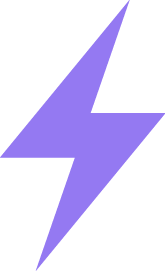

Running local mode, some functionality limited.



In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb
from geopy.distance import lonlat, distance, geodesic
import os
import tarfile
pd.options.display.max_columns = 100
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [2]:
df = pd.concat([pd.read_csv('all_distances.csv'), pd.read_csv('distances1.csv').sort_values('pop', ascending = False)])

In [3]:
df.head()

2016      2016_x Country Code Country Code_x  Unnamed: 0  \
0  34656032.0  34656032.0          AFG            AFG           1   
1  34656032.0  34656032.0          AFG            AFG           2   
2  34656032.0  34656032.0          AFG            AFG           3   
3  34656032.0  34656032.0          AFG            AFG           4   
4  34656032.0  34656032.0          AFG            AFG           5   

   Unnamed: 0.1       city city_ascii city_ascii_x       city_x  combined_pop  \
0            17      Balkh      Balkh  Lashkar Gah  Lashkar Gah      348972.0   
1            18   Meymaneh   Meymaneh  Lashkar Gah  Lashkar Gah      401341.0   
2            21     Ghazni     Ghazni  Lashkar Gah  Lashkar Gah      331438.5   
3            23     Kondoz     Kondoz  Lashkar Gah  Lashkar Gah      412401.5   
4            24  Jalalabad  Jalalabad  Lashkar Gah  Lashkar Gah      603243.0   

       country    country_x    distance  index index_x iso2 iso2_x iso3  \
0  Afghanistan  Afghanistan  619.084509  11397       3   AF     AF  AFG   
1  Afghanistan  Afghanistan  483.679124  11398       3   AF     AF  AFG   
2  Afghanistan  Afghanistan  439.732836  11401       3   AF     AF  AFG   
3  Afghanistan  Afghanistan  706.089725  11403       3   AF     AF  AFG   
4  Afghanistan  Afghanistan  650.081900  11404       3   AF     AF  AFG   

  iso3_x        lat      lat_x  level_0  level_0_x        lng  lng_x  percent  \
0    AFG  36.750120  31.582998      NaN        NaN  66.899730  64.36      NaN   
1    AFG  35.930222  31.582998      NaN        NaN  64.770093  64.36      NaN   
2    AFG  33.563312  31.582998      NaN        NaN  68.417829  64.36      NaN   
3    AFG  36.727951  31.582998      NaN        NaN  68.872530  64.36      NaN   
4    AFG  34.441527  31.582998      NaN        NaN  70.436103  64.36      NaN   

   percent_x       pop     pop_x       power   province province_x  
0        NaN  147426.0  201546.0  563.690409      Balkh    Hilmand  
1        NaN  199795.0  201546.0  829.767050     Faryab    Hilmand  
2        NaN  129892.5  201546.0  753.726974     Ghazni    Hilmand  
3        NaN  210855.5  201546.0  584.063874     Kunduz    Hilmand  
4        NaN  401697.0  201546.0  927.949232  Nangarhar    Hilmand

In [4]:
df['identifier'] = (df['city'].map(str) + df['city_x'] + [str(i) for i in df['combined_pop']] + [str(i) for i in df['distance']] + [str(i) for i in df['lat']])
df.shape

(1251575, 34)

In [5]:
concise = df.sort_values('power', ascending = False)[['Country Code','Country Code_x','city','city_x','pop','pop_x','combined_pop','distance','power','lat','lng','lat_x','lng_x','identifier']]
concise.sort_values(by='combined_pop', ascending = False)

Country Code Country Code_x             city           city_x  \
92034           IND            JPN           Mumbai            Tokyo   
81773           JPN            IND            Tokyo           Mumbai   
101967          JPN            MEX            Tokyo      Mexico City   
92086           MEX            JPN      Mexico City            Tokyo   
91940           CHN            JPN         Shanghai            Tokyo   
45959           JPN            CHN            Tokyo         Shanghai   
14336           JPN            BRA            Tokyo        Sao Paulo   
91857           BRA            JPN        Sao Paulo            Tokyo   
92185           USA            JPN         New York            Tokyo   
139686          JPN            USA            Tokyo         New York   
92107           PAK            JPN          Karachi            Tokyo   
109968          JPN            PAK            Tokyo          Karachi   
91826           ARG            JPN     Buenos Aires            Tokyo   
2525            JPN            ARG            Tokyo     Buenos Aires   
77582           JPN            IND            Tokyo            Delhi   
92023           IND            JPN            Delhi            Tokyo   
92127           RUS            JPN           Moscow            Tokyo   
117588          JPN            RUS            Tokyo           Moscow   
92148           TUR            JPN         Istanbul            Tokyo   
125589          JPN            TUR            Tokyo         Istanbul   
6335            JPN            BGD            Tokyo            Dhaka   
91836           BGD            JPN            Dhaka            Tokyo   
91968           EGY            JPN            Cairo            Tokyo   
56627           JPN            EGY            Tokyo            Cairo   
92072           KOR            JPN            Seoul            Tokyo   
96633           JPN            KOR            Tokyo            Seoul   
82154           JPN            IND            Tokyo          Kolkata   
92035           IND            JPN          Kolkata            Tokyo   
91939           CHN            JPN          Beijing            Tokyo   
45578           JPN            CHN            Tokyo          Beijing   
...             ...            ...              ...              ...   
611566          ETH            CHN       Shashemene            Houma   
984317          CHN            ETH            Houma       Shashemene   
860912          BRA            DZA        Barbacena   Oum el Bouaghi   
151111          DZA            BRA   Oum el Bouaghi        Barbacena   
764757          COD            CPV           Kamina            Praia   
715406          CPV            COD            Praia           Kamina   
128901          COD            BLR           Kamina            Mazyr   
714802          BLR            COD            Mazyr           Kamina   
128948          CPV            BLR            Praia            Mazyr   
764199          BLR            CPV            Mazyr            Praia   
984485          CZE            ETH             Zlin       Shashemene   
788134          ETH            CZE       Shashemene             Zlin   
861449          COD            DZA           Kamina   Oum el Bouaghi   
715498          DZA            COD   Oum el Bouaghi           Kamina   
764895          DZA            CPV   Oum el Bouaghi            Praia   
861496          CPV            DZA            Praia   Oum el Bouaghi   
771318          ETH            CUB       Shashemene  Sancti Spiritus   
984469          CUB            ETH  Sancti Spiritus       Shashemene   
860891          BLR            DZA            Mazyr   Oum el Bouaghi   
129040          DZA            BLR   Oum el Bouaghi            Mazyr   
151228          ETH            BRA       Shashemene        Barbacena   
983879          BRA            ETH        Barbacena       Shashemene   
715615          ETH            COD       Shashemene           Kamina   
984416          COD            ETH           Ka

In [6]:
concise = concise.drop_duplicates(['identifier'])
concise.shape

(1225754, 14)

In [7]:
gdp = pd.read_csv('../50a0b0bb-6586-4a9a-9116-096060cbd4bc_Data.csv')
gdp = gdp.replace('..', np.nan)
gdp.head()

Series Name     Series Code    Country Name Country Code  \
0  GDP (current US$)  NY.GDP.MKTP.CD     Afghanistan          AFG   
1  GDP (current US$)  NY.GDP.MKTP.CD         Albania          ALB   
2  GDP (current US$)  NY.GDP.MKTP.CD         Algeria          DZA   
3  GDP (current US$)  NY.GDP.MKTP.CD  American Samoa          ASM   
4  GDP (current US$)  NY.GDP.MKTP.CD         Andorra          AND   

      2017 [YR2017]  
0  20815300220.0428  
1  13039352743.9616  
2  170370810917.971  
3               NaN  
4  3012914131.16971

In [8]:
concise1 = pd.merge(concise, gdp, left_on='Country Code', right_on='Country Code')
concise1 = concise1.drop(['Series Name','Series Code','Country Name'], 1)
concise1['GDP'] = concise1['2017 [YR2017]']
concise1 = pd.merge(concise1, gdp, left_on='Country Code_x', right_on='Country Code')
concise1['GDP_x'] = concise1['2017 [YR2017]_y']
concise = concise1.drop(['Series Name','Series Code','Country Name', '2017 [YR2017]_x', '2017 [YR2017]_y'], 1)
#concise.drop('Series Name', 'Series Code','Country Name', 1)

In [9]:
concise['GDPpower'] = concise['power']*list(map(float,concise['GDP']))*list(map(float,concise['GDP_x']))

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
list(concise.columns)
concise.columns = ['Country Code',
 'Country Code_x',
 'city',
 'city_x',
 'pop',
 'pop_x',
 'combined_pop',
 'distance',
 'power',
 'lat',
 'lng',
 'lat_x',
 'lng_x',
 'identifier',
 'GDP',
 'Country Code_y',
 'GDP_x',
 'GDPpower']

In [11]:
concise.tail()

Country Code Country Code_x        city city_x       pop     pop_x  \
1225749          BHS            FJI      Nassau   Suva  194453.0  131835.0   
1225750          BRB            FJI  Bridgetown   Suva  143865.0  131835.0   
1225751          GMB            FJI     Brikama   Suva  136418.0  131835.0   
1225752          CPV            FJI       Praia   Suva  101111.5  131835.0   
1225753          BWA            FJI    Gaborone   Suva  183827.0  131835.0   

         combined_pop      distance      power        lat        lng  \
1225749      326288.0  12243.087134  26.650795  25.083390 -77.350044   
1225750      275700.0  13807.145703  19.967921  13.102003 -59.616527   
1225751      268253.0  18327.232768  14.636852  13.280364 -16.659950   
1225752      232946.5  17664.601960  13.187192  14.916698 -23.516689   
1225753      315662.0  14420.286584  21.890134 -24.646313  25.911948   

             lat_x       lng_x  \
1225749 -18.133016  178.441707   
1225750 -18.133016  178.441707   
1225751 -18.133016  178.441707   
1225752 -18.133016  178.441707   
1225753 -18.133016  178.441707   

                                                identifier               GDP  \
1225749    NassauSuva326288.012243.08713363308625.08339012       12162100000   
1225750  BridgetownSuva275700.013807.14570347031413.102...   4796845980.8226   
1225751    BrikamaSuva268253.018327.2327682885613.28036379  1014621519.85866   
1225752     PraiaSuva232946.517664.60196015788514.91669802  1753736711.67273   
1225753  GaboroneSuva315662.014420.286584002108-24.6463...  17406530780.7155   

        Country Code_y             GDP_x      GDPpower  
1225749            FJI  5061202767.42948  1.640486e+21  
1225750            FJI  5061202767.42948  4.847774e+20  
1225751            FJI  5061202767.42948  7.516324e+19  
1225752            FJI  5061202767.42948  1.170497e+20  
1225753            FJI  5061202767.42948  1.928477e+21

In [12]:
def city(value):
    return pd.concat([concise[concise['city'] == str(value)],concise[concise['city_x'] == str(value)]]).sort_values('power', ascending=False)

In [13]:
concise[concise['city'] == 'Tokyo'].sort_values(by='GDPpower', ascending = False)

Country Code Country Code_x   city          city_x         pop  \
454607           JPN            JPN  Tokyo        Kawasaki  22006299.5   
454609           JPN            JPN  Tokyo        Yokohama  22006299.5   
454617           JPN            JPN  Tokyo          Nagoya  22006299.5   
454619           JPN            JPN  Tokyo          Sendai  22006299.5   
454620           JPN            JPN  Tokyo           Osaka  22006299.5   
454624           JPN            JPN  Tokyo           Kyoto  22006299.5   
454626           JPN            JPN  Tokyo            Kobe  22006299.5   
477481           JPN            CHN  Tokyo        Shanghai  22006299.5   
477483           JPN            CHN  Tokyo           Jilin  22006299.5   
477484           JPN            CHN  Tokyo        Shenyeng  22006299.5   
477485           JPN            CHN  Tokyo       Changchun  22006299.5   
477486           JPN            CHN  Tokyo          Harbin  22006299.5   
477488           JPN            CHN  Tokyo          Fushun  22006299.5   
477490           JPN            CHN  Tokyo          Dalian  22006299.5   
477491           JPN            CHN  Tokyo         Beijing  22006299.5   
477492           JPN            CHN  Tokyo          Anshan  22006299.5   
477493           JPN            CHN  Tokyo          Yantai  22006299.5   
477494           JPN            CHN  Tokyo         Qingdao  22006299.5   
454632           JPN            JPN  Tokyo       Hiroshima  22006299.5   
477495           JPN            CHN  Tokyo         Tianjin  22006299.5   
477496           JPN            CHN  Tokyo           Jinxi  22006299.5   
477497           JPN            CHN  Tokyo         Nanjing  22006299.5   
477498           JPN            CHN  Tokyo          Ningbo  22006299.5   
477499           JPN            CHN  Tokyo          Suzhou  22006299.5   
477500           JPN            CHN  Tokyo        Hangzhou  22006299.5   
477501           JPN            CHN  Tokyo         Qiqihar  22006299.5   
477502           JPN            CHN  Tokyo            Wuxi  22006299.5   
477503           JPN            CHN  Tokyo         Shuyang  22006299.5   
477504           JPN            CHN  Tokyo       Changzhou  22006299.5   
477505           JPN            CHN  Tokyo            Zibo  22006299.5   
...              ...            ...    ...             ...         ...   
808490           JPN            CIV  Tokyo         Abidjan  22006299.5   
362784           JPN            COD  Tokyo      Lubumbashi  22006299.5   
362785           JPN            COD  Tokyo      Mbuji-Mayi  22006299.5   
398675           JPN            CMR  Tokyo          Douala  22006299.5   
398676           JPN            CMR  Tokyo         Yaounde  22006299.5   
1158562          JPN            BOL  Tokyo          La Paz  22006299.5   
1158563          JPN            BOL  Tokyo      Santa Cruz  22006299.5   
430796           JPN            UGA  Tokyo         Kampala  22006299.5   
1014726          JPN            ZMB  Tokyo          Lusaka  22006299.5   
64094            JPN            GEO  Tokyo         Tbilisi  22006299.5   
57127            JPN            ARM  Tokyo         Yerevan  22006299.5   
1020965          JPN            ZWE  Tokyo          Harare  22006299.5   
1010916          JPN            SEN  Tokyo           Dakar  22006299.5   
864047           JPN            MLI  Tokyo          Bamako  22006299.5   
1030490          JPN            MDG  Tokyo    Antananarivo  22006299.5   
1062489          JPN            MOZ  Tokyo          Maputo  22006299.5   
1015249          JPN            GIN  Tokyo         Conakry  22006299.5   
840035           JPN            COG  Tokyo     Brazzaville  22006299.5   
1140841          JPN            HTI  Tokyo  Port-au-Prince  22006299.5   
848610           JPN            TGO  Tokyo            Lome  22006299.5   
32001            JPN            SYR  Tokyo          Aleppo  22006299.5   
32002            JPN            SYR  Tokyo        Damascus  22006299.5   
98373       

In [14]:
concise.sort_values(by='GDPpower', ascending = False)[concise['distance'] > 1000]

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Country Code Country Code_x              city           city_x  \
852175           USA            USA           Chicago         New York   
852174           USA            USA          New York          Chicago   
852185           USA            USA          New York     Indianapolis   
852184           USA            USA      Indianapolis         New York   
852194           USA            USA           Atlanta         New York   
852195           USA            USA          New York          Atlanta   
852214           USA            USA          New York        St. Louis   
852215           USA            USA         St. Louis         New York   
852220           USA            USA             Miami         New York   
852221           USA            USA          New York            Miami   
852224           USA            USA             Tampa         New York   
852225           USA            USA          New York            Tampa   
852226           USA            USA       Minneapolis         New York   
852227           USA            USA          New York      Minneapolis   
549048           CHN            CHN          Shanghai          Beijing   
549047           CHN            CHN           Beijing         Shanghai   
852233           USA            USA           Chicago     Philadelphia   
852232           USA            USA      Philadelphia          Chicago   
852238           USA            USA          New York  Fort Lauderdale   
852239           USA            USA   Fort Lauderdale         New York   
852253           USA            USA           Houston         New York   
852252           USA            USA          New York          Houston   
852256           USA            USA            Denver      Los Angeles   
852257           USA            USA       Los Angeles           Denver   
852262           USA            USA            Dallas         New York   
852263           USA            USA          New York           Dallas   
852268           USA            USA       Los Angeles         Portland   
852269           USA            USA          Portland      Los Angeles   
852270           USA            USA           Chicago           Dallas   
852271           USA            USA            Dallas          Chicago   
...              ...            ...               ...              ...   
1224616          ERI            CRI         Mendefera         Alajuela   
1224617          ERI            CRI             Assab         Alajuela   
1224618          ERI            CRI             Keren          Cartago   
1224619          ERI            CRI           Massawa          Cartago   
1224620          ERI            CRI         Mendefera          Cartago   
1224621          ERI            CRI             Assab          Cartago   
1224664          CUW            CRI        Willemstad         San Jose   
1224665          CUW            CRI        Willemstad         Alajuela   
1224666          CUW            CRI        Willemstad          Cartago   
1225624          CUB            FJI            Havana             Suva   
1225625          CUB            FJI  Santiago de Cuba             Suva   
1225626          CUB            FJI          Camaguey             Suva   
1225627          CUB            FJI           Holguin             Suva   
1225628          CUB            FJI       Santa Clara             Suva   
1225629          CUB            FJI        Guantanamo             Suva   
1225630          CUB            FJI     Pinar del Rio             Suva   
1225631          CUB            FJI         Las Tunas             Suva   
1225632          CUB            FJI            Bayamo             Suva   
1225633          CUB            FJI        Cienfuegos             Suva   
1225634          CUB            FJI          Matanzas             Suva   
1225635          CUB            FJI    Ciego de Avila             Suva   
1225636          CUB            FJI        Manzanillo             Suva   
1225637     

In [15]:
city('Seattle').sort_values(by='GDPpower', ascending = False)[concise['distance'] > 1000]

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Country Code Country Code_x           city         city_x         pop  \
852286           USA            USA    Los Angeles        Seattle   8097410.0   
852287           USA            USA        Seattle    Los Angeles   1821684.5   
852413           USA            USA        Seattle       New York   1821684.5   
852412           USA            USA       New York        Seattle  13524139.0   
852458           USA            USA  San Francisco        Seattle   2091036.0   
852459           USA            USA        Seattle  San Francisco   1821684.5   
852546           USA            USA     Sacramento        Seattle   1035949.0   
852547           USA            USA        Seattle     Sacramento   1821684.5   
852565           USA            USA        Chicago        Seattle   5915976.0   
852564           USA            USA        Seattle        Chicago   1821684.5   
852578           USA            USA        Seattle       San Jose   1821684.5   
852579           USA            USA       San Jose        Seattle   1281471.5   
852648           USA            USA        Phoenix        Seattle   2436022.5   
852649           USA            USA        Seattle        Phoenix   1821684.5   
852663           USA            USA        Seattle         Denver   1821684.5   
852662           USA            USA         Denver        Seattle   1930799.5   
852678           USA            USA      San Diego        Seattle   1938570.5   
852679           USA            USA        Seattle      San Diego   1821684.5   
852685           USA            USA        Seattle         Irvine   1821684.5   
852684           USA            USA         Irvine        Seattle   1611303.5   
852697           USA            USA        Seattle      Las Vegas   1821684.5   
852696           USA            USA      Las Vegas        Seattle   1150717.0   
852725           USA            USA     Long Beach        Seattle   1249195.5   
852724           USA            USA        Seattle     Long Beach   1821684.5   
852731           USA            USA        Seattle        Houston   1821684.5   
852730           USA            USA        Houston        Seattle   4053287.0   
852762           USA            USA         Dallas        Seattle   3004852.0   
852763           USA            USA        Seattle         Dallas   1821684.5   
852813           USA            USA    Minneapolis        Seattle   1491886.5   
852812           USA            USA        Seattle    Minneapolis   1821684.5   
...              ...            ...            ...            ...         ...   
860948           GIN            USA        Conakry        Seattle   1494000.0   
1016356          USA            GIN        Seattle        Conakry   1821684.5   
1030555          USA            MDG        Seattle   Antananarivo   1821684.5   
861500           MDG            USA   Antananarivo        Seattle   1544216.5   
860975           MOZ            USA         Maputo        Seattle   1318806.5   
1062557          USA            MOZ        Seattle         Maputo   1821684.5   
840498           USA            COG        Seattle    Brazzaville   1821684.5   
851504           COG            USA    Brazzaville        Seattle   1259445.0   
848680           USA            TGO        Seattle           Lome   1821684.5   
859954           TGO            USA           Lome        Seattle   1100850.0   
1144644          USA            CUB        Seattle         Havana   1821684.5   
859698           CUB            USA         Havana        Seattle   2082458.5   
1129463          USA            VEN        Seattle        Caracas   1821684.5   
858574           VEN            USA        Caracas        Seattle   2400339.5   
1129474          USA            VEN        Seattle      Maracaibo   1821684.5   
858585           VEN            USA      Maracaibo        Seattle   1764650.0   
1094764          USA            PRK        Seattle      Pyongyang   1821684.5   
858453           PRK            USA    

In [16]:
concise.sort_values(by='combined_pop', ascending = False)

Country Code Country Code_x             city           city_x  \
454157           IND            JPN           Mumbai            Tokyo   
74058            JPN            IND            Tokyo           Mumbai   
456465           MEX            JPN      Mexico City            Tokyo   
1027771          JPN            MEX            Tokyo      Mexico City   
477481           JPN            CHN            Tokyo         Shanghai   
455607           CHN            JPN         Shanghai            Tokyo   
454716           BRA            JPN        Sao Paulo            Tokyo   
869029           JPN            BRA            Tokyo        Sao Paulo   
455135           USA            JPN         New York            Tokyo   
850496           JPN            USA            Tokyo         New York   
68830            JPN            PAK            Tokyo          Karachi   
456696           PAK            JPN          Karachi            Tokyo   
456553           ARG            JPN     Buenos Aires            Tokyo   
1035336          JPN            ARG            Tokyo     Buenos Aires   
454156           IND            JPN            Delhi            Tokyo   
74057            JPN            IND            Tokyo            Delhi   
457544           RUS            JPN           Moscow            Tokyo   
53639            JPN            RUS            Tokyo           Moscow   
35387            JPN            TUR            Tokyo         Istanbul   
456982           TUR            JPN         Istanbul            Tokyo   
454958           BGD            JPN            Dhaka            Tokyo   
436152           JPN            BGD            Tokyo            Dhaka   
454089           EGY            JPN            Cairo            Tokyo   
944              JPN            EGY            Tokyo            Cairo   
1011673          JPN            KOR            Tokyo            Seoul   
455497           KOR            JPN            Seoul            Tokyo   
454155           IND            JPN          Kolkata            Tokyo   
74056            JPN            IND            Tokyo          Kolkata   
455617           CHN            JPN          Beijing            Tokyo   
477491           JPN            CHN            Tokyo          Beijing   
...              ...            ...              ...              ...   
113070           CHN            ETH            Houma       Shashemene   
756059           ETH            CHN       Shashemene            Houma   
172242           BRA            DZA        Barbacena   Oum el Bouaghi   
981843           DZA            BRA   Oum el Bouaghi        Barbacena   
391876           CPV            COD            Praia           Kamina   
1064158          COD            CPV           Kamina            Praia   
344215           COD            BLR           Kamina            Mazyr   
388900           BLR            COD            Mazyr           Kamina   
354654           CPV            BLR            Praia            Mazyr   
1064913          BLR            CPV            Mazyr            Praia   
117980           CZE            ETH             Zlin       Shashemene   
361073           ETH            CZE       Shashemene             Zlin   
173210           COD            DZA           Kamina   Oum el Bouaghi   
385982           DZA            COD   Oum el Bouaghi           Kamina   
202482           CPV            DZA            Praia   Oum el Bouaghi   
1064813          DZA            CPV   Oum el Bouaghi            Praia   
117368           CUB            ETH  Sancti Spiritus       Shashemene   
1153912          ETH            CUB       Shashemene  Sancti Spiritus   
352150           DZA            BLR   Oum el Bouaghi            Mazyr   
198961           BLR            DZA            Mazyr   Oum el Bouaghi   
108772           BRA            ETH        Barbacena       Shashemene   
989013           ETH            BRA       Shashemene        Barbacena   
109085           COD            ETH           Kamina       Shashem

In [17]:
usa = concise[concise['Country Code'] == 'USA'].sort_values(by='power', ascending = False)
usa

Country Code Country Code_x              city            city_x  \
852113           USA            USA        Long Beach       Los Angeles   
852112           USA            USA       Los Angeles        Long Beach   
852114           USA            USA       Los Angeles            Irvine   
852115           USA            USA            Irvine       Los Angeles   
852117           USA            USA      Philadelphia          New York   
852116           USA            USA          New York      Philadelphia   
852118           USA            USA             Miami   Fort Lauderdale   
852119           USA            USA   Fort Lauderdale             Miami   
1028163          USA            MEX         San Diego           Tijuana   
852120           USA            USA        Long Beach            Irvine   
852121           USA            USA            Irvine        Long Beach   
852123           USA            USA         Ft. Worth            Dallas   
852122           USA            USA            Dallas         Ft. Worth   
852124           USA            USA  Washington, D.C.         Baltimore   
852125           USA            USA         Baltimore  Washington, D.C.   
852126           USA            USA       Los Angeles         San Diego   
852127           USA            USA         San Diego       Los Angeles   
852128           USA            USA          New York         Baltimore   
852129           USA            USA         Baltimore          New York   
852130           USA            USA          New York            Boston   
852131           USA            USA            Boston          New York   
1028164          USA            MEX       Los Angeles           Tijuana   
852133           USA            USA          New York  Washington, D.C.   
852132           USA            USA  Washington, D.C.          New York   
852134           USA            USA     San Francisco          San Jose   
852135           USA            USA          San Jose     San Francisco   
852136           USA            USA      Philadelphia         Baltimore   
852137           USA            USA         Baltimore      Philadelphia   
1072979          USA            CAN          New York           Toronto   
852138           USA            USA         San Diego            Irvine   
...              ...            ...               ...               ...   
1022441          USA            IDN          Columbus      Ujungpandang   
1022442          USA            IDN          Columbus          Semarang   
77411            USA            IND   Fort Lauderdale          Sholapur   
1022443          USA            IDN         Cleveland           Cilacap   
1014807          USA            ZMB        Sacramento            Lusaka   
77412            USA            IND         Ft. Worth        Vijayawada   
77413            USA            IND         Ft. Worth           Madurai   
77414            USA            IND   Fort Lauderdale           Madurai   
1022444          USA            IDN             Tampa           Cilacap   
77415            USA            IND   Fort Lauderdale        Vijayawada   
77416            USA            IND   Fort Lauderdale             Kochi   
1208037          USA            AUS         Baltimore             Perth   
368854           USA            COD        Sacramento        Mbuji-Mayi   
77417            USA            IND         Ft. Worth             Kochi   
1022445          USA            IDN      Indianapolis           Cilacap   
1025372          USA            ZAF        Sacramento          Pretoria   
1208038          USA            AUS         St. Louis             Perth   
1022446          USA            IDN         Ft. Worth           Cilacap   
1022447          USA            IDN   Fort Lauderdale      Ujungpandang   
1022448          USA            IDN   Fort Lauderdale          Semarang   
1208039          USA            AUS             Tampa             Perth   
1062570          USA            M

In [18]:
#usa = usa.reset_index()
usa['citya'] = ((usa['city'] +usa['Country Code'] +';*'+ usa['city_x'] + usa['Country Code_x']))
usa['cityb'] = [sorted(x.split(';*')) for x in usa['citya']]

In [19]:
usa.shape

(12573, 20)

In [20]:
usa['city1'] = [x[0] for x in usa['cityb']]
usa['city2'] = [x[1] for x in usa['cityb']]
usa['identifier'] = (usa['city1'].map(str) + usa['city2'].map(str))
usa.head()

Country Code Country Code_x          city       city_x        pop  \
852113          USA            USA    Long Beach  Los Angeles  1249195.5   
852112          USA            USA   Los Angeles   Long Beach  8097410.0   
852114          USA            USA   Los Angeles       Irvine  8097410.0   
852115          USA            USA        Irvine  Los Angeles  1611303.5   
852117          USA            USA  Philadelphia     New York  3504775.0   

             pop_x  combined_pop    distance          power        lat  \
852113   8097410.0     9346605.5   22.609290  413396.680286  33.786967   
852112   1249195.5     9346605.5   22.609290  413396.680286  33.989978   
852114   1611303.5     9708713.5   47.209887  205650.005115  33.989978   
852115   8097410.0     9708713.5   47.209887  205650.005115  33.680411   
852117  13524139.0    17028914.0  130.951058  130040.293709  39.999973   

               lng      lat_x       lng_x                   identifier  \
852113 -118.158044  33.989978 -118.179980  Long BeachUSALos AngelesUSA   
852112 -118.179980  33.786967 -118.158044  Long BeachUSALos AngelesUSA   
852114 -118.179980  33.680411 -117.829950      IrvineUSALos AngelesUSA   
852115 -117.829950  33.989978 -118.179980      IrvineUSALos AngelesUSA   
852117  -75.169996  40.749979  -73.980017   New YorkUSAPhiladelphiaUSA   

                   GDP Country Code_y           GDP_x      GDPpower  \
852113  19390604000000            USA  19390604000000  1.554353e+32   
852112  19390604000000            USA  19390604000000  1.554353e+32   
852114  19390604000000            USA  19390604000000  7.732348e+31   
852115  19390604000000            USA  19390604000000  7.732348e+31   
852117  19390604000000            USA  19390604000000  4.889457e+31   

                                citya                            cityb  \
852113  Long BeachUSA;*Los AngelesUSA  [Long BeachUSA, Los AngelesUSA]   
852112  Los AngelesUSA;*Long BeachUSA  [Long BeachUSA, Los AngelesUSA]   
852114      Los AngelesUSA;*IrvineUSA      [IrvineUSA, Los AngelesUSA]   
852115      IrvineUSA;*Los AngelesUSA      [IrvineUSA, Los AngelesUSA]   
852117   PhiladelphiaUSA;*New YorkUSA   [New YorkUSA, PhiladelphiaUSA]   

                city1            city2  
852113  Long BeachUSA   Los AngelesUSA  
852112  Long BeachUSA   Los AngelesUSA  
852114      IrvineUSA   Los AngelesUSA  
852115      IrvineUSA   Los AngelesUSA  
852117    New YorkUSA  PhiladelphiaUSA

In [21]:
usa = usa.drop_duplicates(subset='identifier').drop(['identifier','citya','cityb','city1','city2'], 1)
usa

Country Code Country Code_x              city            city_x  \
852113           USA            USA        Long Beach       Los Angeles   
852114           USA            USA       Los Angeles            Irvine   
852117           USA            USA      Philadelphia          New York   
852118           USA            USA             Miami   Fort Lauderdale   
1028163          USA            MEX         San Diego           Tijuana   
852120           USA            USA        Long Beach            Irvine   
852123           USA            USA         Ft. Worth            Dallas   
852124           USA            USA  Washington, D.C.         Baltimore   
852126           USA            USA       Los Angeles         San Diego   
852128           USA            USA          New York         Baltimore   
852130           USA            USA          New York            Boston   
1028164          USA            MEX       Los Angeles           Tijuana   
852133           USA            USA          New York  Washington, D.C.   
852134           USA            USA     San Francisco          San Jose   
852136           USA            USA      Philadelphia         Baltimore   
1072979          USA            CAN          New York           Toronto   
852138           USA            USA         San Diego            Irvine   
1072980          USA            CAN          New York          Montréal   
852140           USA            USA  Washington, D.C.      Philadelphia   
852142           USA            USA          New York        Pittsburgh   
852144           USA            USA           Chicago      Indianapolis   
852146           USA            USA         Las Vegas       Los Angeles   
852148           USA            USA         Cleveland           Detroit   
852151           USA            USA        Sacramento     San Francisco   
852152           USA            USA         San Diego        Long Beach   
852154           USA            USA         Cleveland          New York   
852157           USA            USA           Chicago           Detroit   
1072981          USA            CAN           Detroit           Toronto   
1028165          USA            MEX            Irvine           Tijuana   
852159           USA            USA          New York           Detroit   
...              ...            ...               ...               ...   
1022441          USA            IDN          Columbus      Ujungpandang   
1022442          USA            IDN          Columbus          Semarang   
77411            USA            IND   Fort Lauderdale          Sholapur   
1022443          USA            IDN         Cleveland           Cilacap   
1014807          USA            ZMB        Sacramento            Lusaka   
77412            USA            IND         Ft. Worth        Vijayawada   
77413            USA            IND         Ft. Worth           Madurai   
77414            USA            IND   Fort Lauderdale           Madurai   
1022444          USA            IDN             Tampa           Cilacap   
77415            USA            IND   Fort Lauderdale        Vijayawada   
77416            USA            IND   Fort Lauderdale             Kochi   
1208037          USA            AUS         Baltimore             Perth   
368854           USA            COD        Sacramento        Mbuji-Mayi   
77417            USA            IND         Ft. Worth             Kochi   
1022445          USA            IDN      Indianapolis           Cilacap   
1025372          USA            ZAF        Sacramento          Pretoria   
1208038          USA            AUS         St. Louis             Perth   
1022446          USA            IDN         Ft. Worth           Cilacap   
1022447          USA            IDN   Fort Lauderdale      Ujungpandang   
1022448          USA            IDN   Fort Lauderdale          Semarang   
1208039          USA            AUS             Tampa             Perth   
1062570          USA            M

concise = concise.reset_index()
concise['citya'] = ((concise['city'] +concise['Country Code'] +','+ concise['city_x'] + concise['Country Code_x']))
concise['cityb'] = [sorted(x.split(',')) for x in concise['citya']]

In [22]:
#concise.drop_duplicates(['cityb'])

In [23]:
usa.sort_values(by='power', ascending = False)[usa['Country Code'] == 'USA'][usa['Country Code_x'] == 'USA']

Country Code Country Code_x              city            city_x  \
852113          USA            USA        Long Beach       Los Angeles   
852114          USA            USA       Los Angeles            Irvine   
852117          USA            USA      Philadelphia          New York   
852118          USA            USA             Miami   Fort Lauderdale   
852120          USA            USA        Long Beach            Irvine   
852123          USA            USA         Ft. Worth            Dallas   
852124          USA            USA  Washington, D.C.         Baltimore   
852126          USA            USA       Los Angeles         San Diego   
852128          USA            USA          New York         Baltimore   
852130          USA            USA          New York            Boston   
852133          USA            USA          New York  Washington, D.C.   
852134          USA            USA     San Francisco          San Jose   
852136          USA            USA      Philadelphia         Baltimore   
852138          USA            USA         San Diego            Irvine   
852140          USA            USA  Washington, D.C.      Philadelphia   
852142          USA            USA          New York        Pittsburgh   
852144          USA            USA           Chicago      Indianapolis   
852146          USA            USA         Las Vegas       Los Angeles   
852148          USA            USA         Cleveland           Detroit   
852151          USA            USA        Sacramento     San Francisco   
852152          USA            USA         San Diego        Long Beach   
852154          USA            USA         Cleveland          New York   
852157          USA            USA           Chicago           Detroit   
852159          USA            USA          New York           Detroit   
852160          USA            USA           Houston            Dallas   
852162          USA            USA       Los Angeles          San Jose   
852164          USA            USA          New York          Columbus   
852166          USA            USA           Phoenix       Los Angeles   
852169          USA            USA       Los Angeles     San Francisco   
852171          USA            USA       San Antonio           Houston   
...             ...            ...               ...               ...   
853109          USA            USA      Indianapolis          San Jose   
853111          USA            USA   Fort Lauderdale     San Francisco   
853112          USA            USA      Indianapolis          Portland   
853114          USA            USA         Baltimore         Las Vegas   
853117          USA            USA          Columbus         Las Vegas   
853119          USA            USA             Tampa        Long Beach   
853121          USA            USA        Long Beach         Cleveland   
853122          USA            USA   Fort Lauderdale            Irvine   
853124          USA            USA        Pittsburgh        Sacramento   
853126          USA            USA         Cleveland          Portland   
853128          USA            USA         Baltimore        Long Beach   
853130          USA            USA          San Jose         Cleveland   
853133          USA            USA        Long Beach          Columbus   
853134          USA            USA      Indianapolis        Sacramento   
853136          USA            USA          Portland         Baltimore   
853138          USA            USA          San Jose         Baltimore   
853140          USA            USA             Tampa          San Jose   
853142          USA            USA          Columbus          San Jose   
853145          USA            USA          Portland          Columbus   
853146          USA            USA   Fort Lauderdale           Seattle   
853149          USA            USA         Cleveland        Sacramento   
853150          USA            USA   Fort Lauderdale         Las Vegas   
853153     

In [ ]:
canada 